# Task 1 : Importing neccessary modules

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
insurance=pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_9\DS2_C6_S1_Insurance_Data_Challenge.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Task 2 : Import data into jupyter 

In [3]:
print("Structure of data " ,insurance.shape)
insurance.describe().T

Structure of data  (1338, 7)


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
def value_counter(df):
    cols=df.select_dtypes(include="object")
    for item in cols:
        print(df[item].value_counts())
        print()
value_counter(insurance)

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



## Task 3 : Missing value imputation

In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Task 4 : Perform Label encoding and scaling 

In [10]:
def labeler(df):
    lab=LabelEncoder()
    df=df.copy()
    cols=df.select_dtypes(include="object")
    for item in cols:
        df[item]=lab.fit_transform(df[item])
    return df
insurance_encoded=labeler(insurance)

def Scaler(df):
    scaler=MinMaxScaler()
    df=df.copy()
    df=pd.DataFrame(scaler.fit_transform(df.to_numpy()),columns=df.columns)
    return df
scaled_df=Scaler(insurance_encoded)
scaled_df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.403820,0.6,0.0,0.333333,0.151299
1334,0.000000,0.0,0.429379,0.0,0.0,0.000000,0.017305
1335,0.000000,0.0,0.562012,0.0,0.0,0.666667,0.008108
1336,0.065217,0.0,0.264730,0.0,0.0,1.000000,0.014144


<AxesSubplot: >

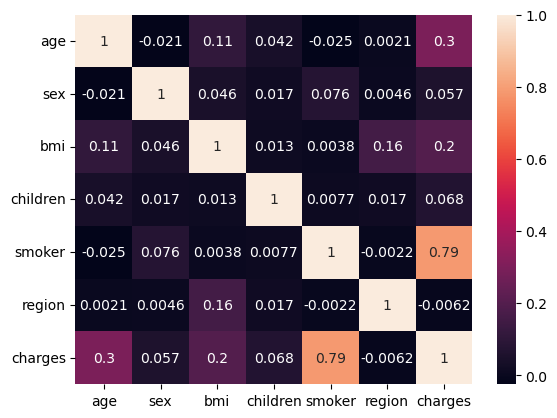

In [15]:
sns.heatmap(scaled_df.corr(),annot=True)

In [16]:
print("Age and Smoker feature has the best correlation ")

Age and Smoker feature has the best correlation 


## Task 5 : To split Train and Test data in 70:30 by index and by function

In [19]:
split=int(len(scaled_df)*0.7)
X=scaled_df[:split]
Y=scaled_df[(split+1):]
print("The structure of X is {0} and Y is {1}".format(X.shape,Y.shape))

The structure of X is (936, 7) and Y is (401, 7)


In [21]:
x=scaled_df.iloc[:,:7]
y=scaled_df.iloc[:,6]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

## Task 6 : Data visualizations

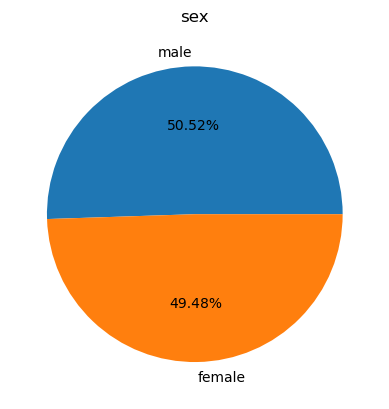

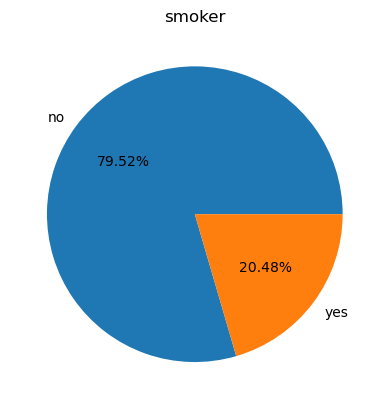

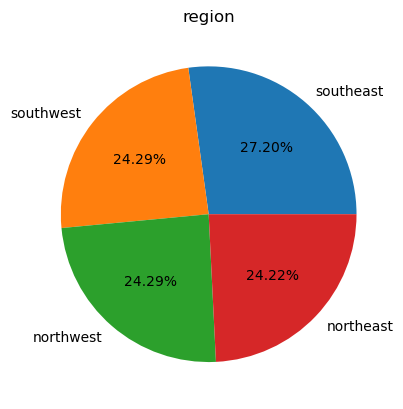

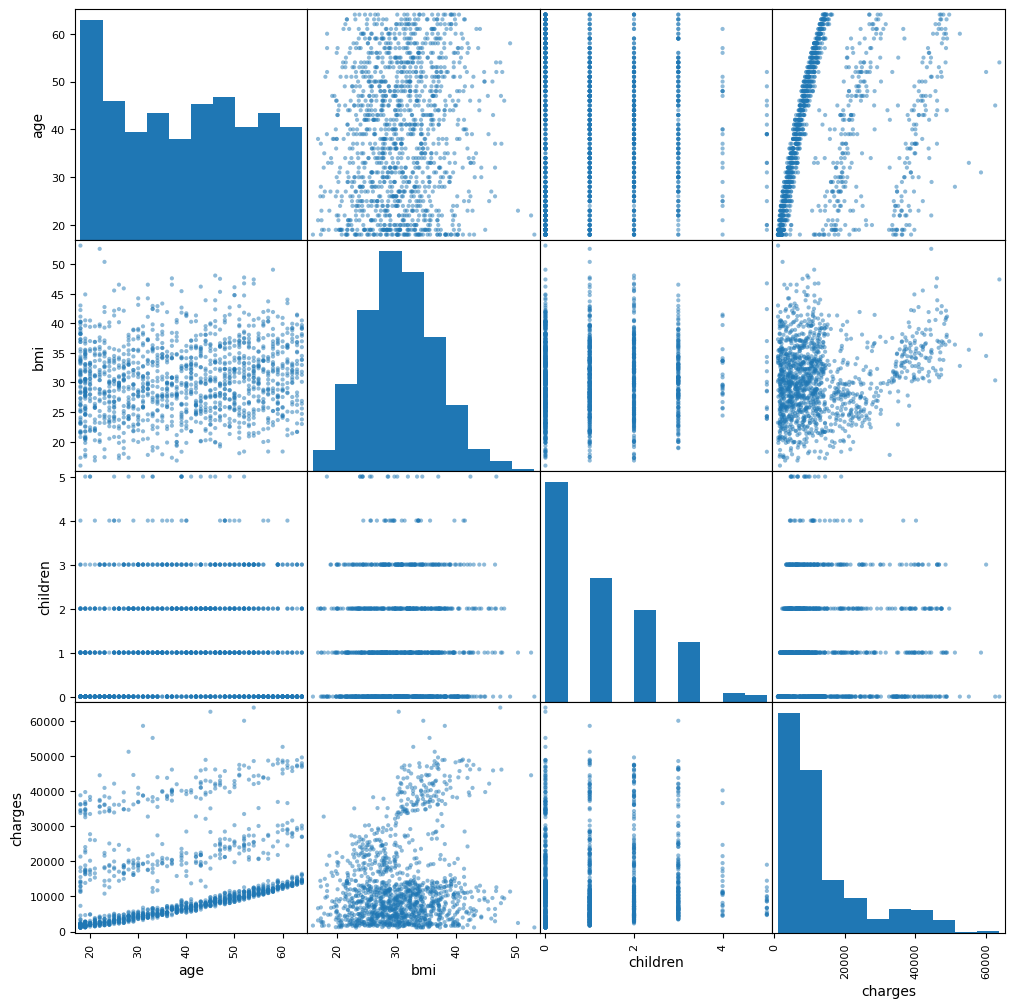

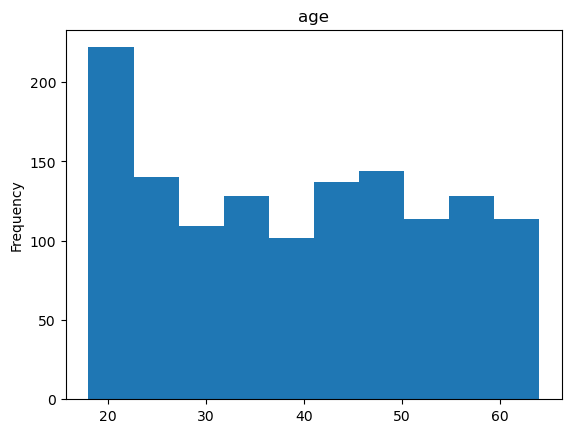

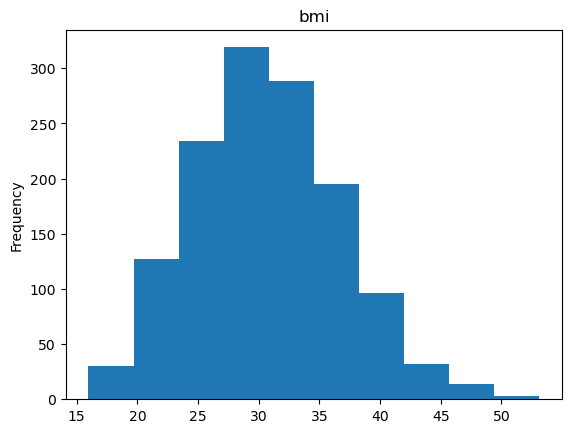

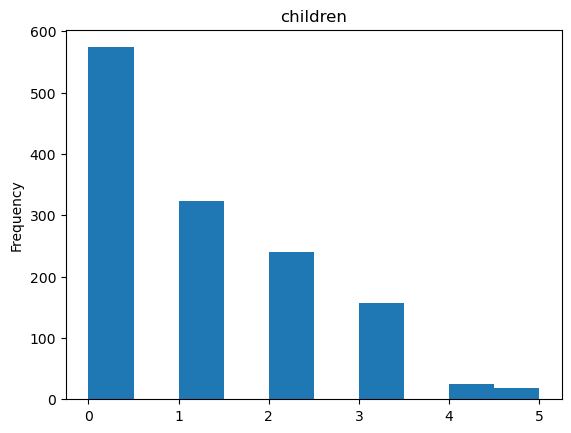

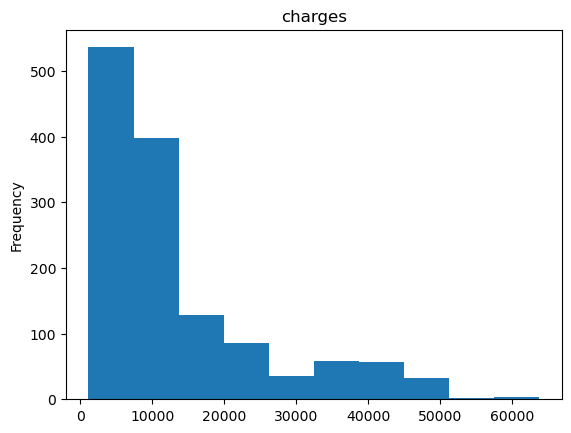

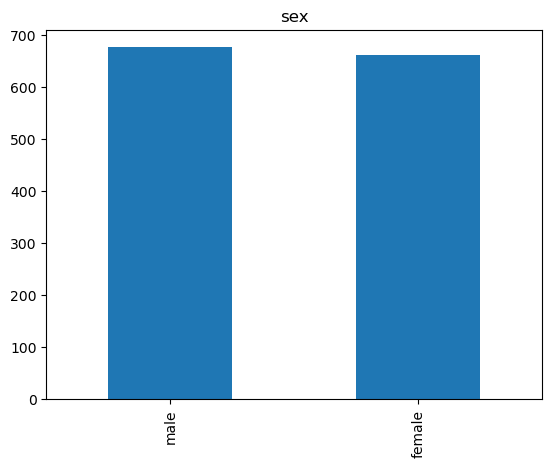

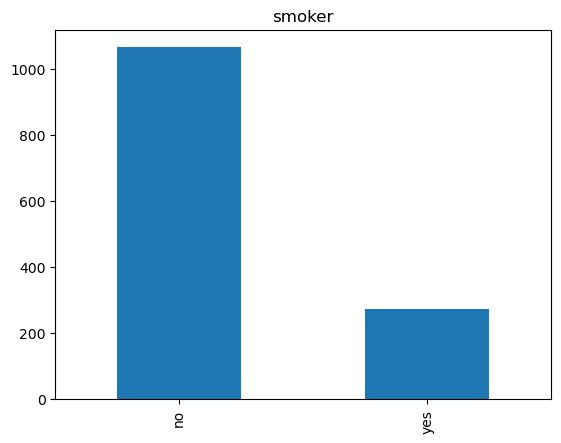

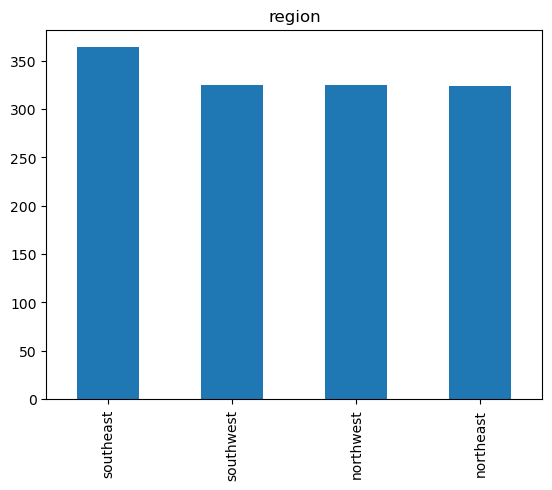

In [23]:
def pie_plotter(df):
    categoricals=df.select_dtypes(include=["object"]).columns
    for item in categoricals:
        garb=df[item].value_counts()
        plt.pie(garb.values,labels=garb.index,autopct="%.2f%%")
        plt.title(item)
        plt.show()
        
def plot_scatter_matrix(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    pd.plotting.scatter_matrix(df[numerical_cols], figsize=(12, 12))
    plt.show()
    
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in numerical_cols:
        df[col].plot(kind='hist', title=col)
        plt.show()
    for col in categorical_cols:
        df[col].value_counts().plot(kind='bar', title=col)
        plt.show()
        
pie_plotter(insurance)
plot_scatter_matrix(insurance)
plot_histograms(insurance)